###I am going to forecast share price of Tata Consultancy Services Limited (TCS). I am fetching data from yahoo finance module. I have performed various techniques on the data like feature engineering, exploratory data analysis, plotting and visualization of the model and results.


**Installing yahoo finance model and other important modules**

In [ ]:
from pandas_datareader import data as web
!pip install yfinance
!pip install fix_yahoo_finance
!pip install -U scikit-learn

**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

**Loading the data and performing forecasting on Tata Consultancy Services Limited (TCS)
(NSE: TCS.NS) for our model.**
 

In [ ]:
import yfinance as yf
hist = yf.Ticker('APOLLOTYRE.NS')
tcs=hist.history('15y', auto_adjust = True)

**Checking the data**

In [ ]:
tcs.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-03-24 00:00:00+05:30,29.524531,30.773180,28.275879,30.168995,929547,0.0,0.0
2008-03-25 00:00:00+05:30,30.612070,36.210857,30.007884,34.680252,1921674,0.0,0.0
2008-03-26 00:00:00+05:30,35.445555,35.928903,33.109370,33.592720,908599,0.0,0.0
2008-03-27 00:00:00+05:30,33.069100,33.995520,32.626031,33.109379,514967,0.0,0.0
2008-03-28 00:00:00+05:30,33.028815,34.035792,32.827420,33.834396,438240,0.0,0.0


In [ ]:
tcs.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [ ]:
tcs.shape

(3699, 7)

**Graphical representaion of TCS closed price for the past 15 years**

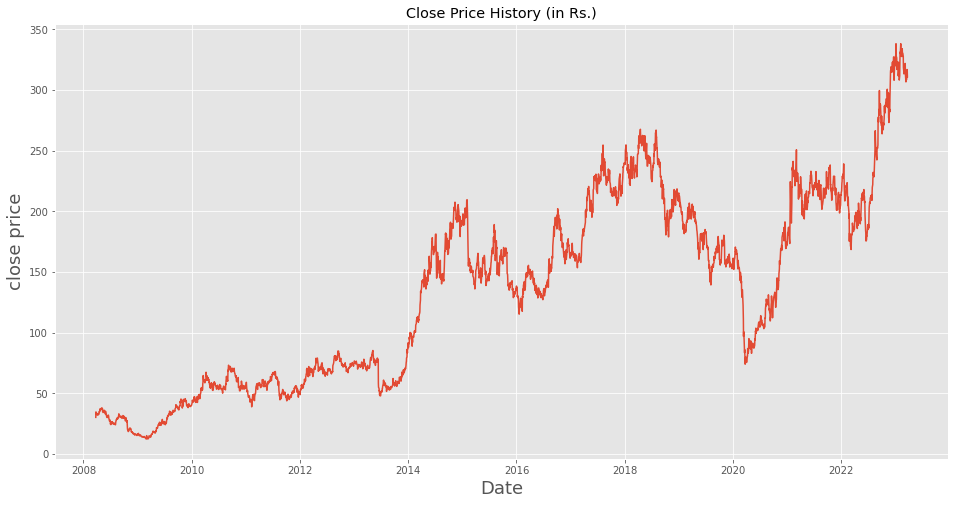

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History (in Rs.)')
plt.plot(tcs['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price', fontsize=18)
plt.show()

### **Forecasting analysis using Recurrent Neural Network**

In [ ]:
import math
new_data = tcs.filter(['Close'])
data=new_data.values
train_data_length =math.ceil(len(data) * 0.8)
train_data_length 

2960

**Scaling the features**

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.05479774],
       [0.06863618],
       [0.06530014],
       ...,
       [0.93466157],
       [0.92898661],
       [0.91625636]])

**Creating the training dataset and splitting the data into train and test, Creating a dataframe structure with 60 timesteps and 1 output**

In [ ]:
train_data= scaled_data[0:train_data_length,:]
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.05479774, 0.06863618, 0.06530014, 0.06381747, 0.06604149,
       0.06431167, 0.06418812, 0.06418812, 0.06097562, 0.06035781,
       0.06109919, 0.06307609, 0.06369388, 0.0633232 , 0.06184051,
       0.06369388, 0.06950108, 0.0682655 , 0.06987174, 0.07604963,
       0.07666737, 0.07296066, 0.07506116, 0.07543181, 0.07481405,
       0.07555537, 0.07876788, 0.07839722, 0.07777943, 0.07654385,
       0.07703808, 0.06987174, 0.06702993, 0.06727705, 0.06789484,
       0.0723429 , 0.07011886, 0.0699953 , 0.07271358, 0.0706131 ,
       0.06937751, 0.06665924, 0.06357034, 0.06344676, 0.07011886,
       0.06678283, 0.06282899, 0.06048138, 0.05850448, 0.05813377,
       0.05615689, 0.05430352, 0.05578621, 0.05689822, 0.05677467,
       0.05974006, 0.0589987 , 0.06035781, 0.0589987 , 0.0566511 ])]
[0.052820839374818074]



In [ ]:
# Coverting x_train and y_train into numpy arrays
x_train, y_train=np.array(x_train), np.array(y_train)

In [ ]:
# Reshaping the data
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2900, 60, 1)

**Building the LSTM model**

In [ ]:
# Initialising the RNN
model=Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


# Adding the second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))


# Adding the third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))


# Adding the fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

**Compiling the model**

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

**Fitting the model to the training set**

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2900/2900 [==============================] - 209s 68ms/step - loss: 0.0037


**Creating test data set**

In [ ]:
test_data = scaled_data[train_data_length -60:, :]
x_test = []
y_test = data[train_data_length:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Coverting x_test and y_test into numpy arrays
x_test=np.array(x_test)

In [ ]:
# Reshaping the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(739, 60, 1)

**Getting the model's predicted price values**

In [ ]:
predictions = model.predict(x_test)

# Unscaling the values
predictions = scaler.inverse_transform(predictions)


24/24 [==============================] - 2s 35ms/step


**Evaluating the model**

In [ ]:
# Using Root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

11.048850930592042

In [ ]:
predictions

**Plotting and visualization of the results**

<ipython-input-22-87658d4503f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid ['Predictions'] = predictions


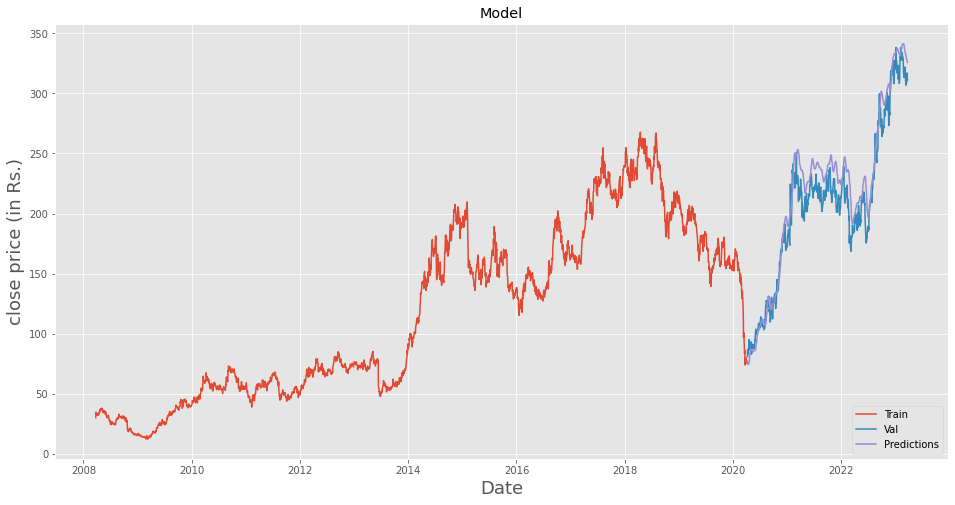

In [ ]:
# Plotting the data
train = tcs[:train_data_length]
valid = tcs[train_data_length:]
valid ['Predictions'] = predictions

# Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price (in Rs.)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

**Red line(Train) - represents the data on which model was trained on.**

**Blue line(Val) - represents the actual values for the rest of the days(actual closing stock price for tcs for the rest of the days)**

**Purple line(Predictions) -  represents our model predictions**

### Ending notes - As we can see that our model performed pretty decent. It gave good predictions given that we know the uncertainity of stock market.